In [51]:
import mute.constants as mtc
import mute.surface as mts
import mute.propagation as mtp
import mute.underground as mtu

import numpy as np
import matplotlib.pyplot as plt
import inspect

Calculating underground fluxes.
Loading surface fluxes for USStd using GSF and DDM.
Loaded surface fluxes.
Loading survival probabilities from C:\Users\walte\anaconda3\lib\site-packages\mute\data\survival_probabilities\rock_2.65_100000_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to C:\Users\walte\anaconda3\lib\site-packages\mute\data\underground\Default_Underground_Intensities_tr.txt.
Calculating underground fluxes.
Loading surface fluxes for USStd using GSF and SIBYLL-2.3d.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 100000 muons.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities writ

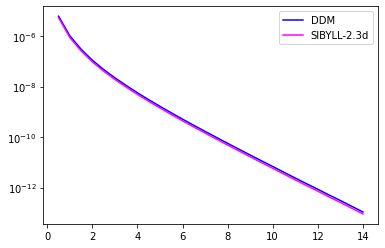

In [5]:
mtc.set_overburden("flat")
mtc.set_medium("rock")
mtc.set_density(2.65)

# Calculate true vertical intensities for the default slant depths and atmosphere

intensities_DDM = mtu.calc_u_intensities(method = "tr", interaction_model = "DDM")
intensities_SIBYLL = mtu.calc_u_intensities(method = "tr", interaction_model = "SIBYLL-2.3d")

# Plot the results

plt.figure(facecolor = "white")
plt.semilogy(mtc.slant_depths, intensities_DDM, color = "blue", label = "DDM")
plt.semilogy(mtc.slant_depths, intensities_SIBYLL, color = "magenta", label = "SIBYLL-2.3d")
plt.legend()
plt.show()

In [67]:
mtc.set_vertical_depth(0.1) # km.w.e. (water-equivalent kilometers, aka 1e4 g/cm^2)

Exception: The minimum default available slant depth is 0.5 km.w.e. Set constants.shallow_extrapolation to True to enable calculations for depths lower than 0.5 km.w.e. (not recommended).

In [64]:
mtu.calc_u_tot_flux()

Calculating underground fluxes.
Loading surface fluxes for USStd using GSF and SIBYLL-2.3c.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 100000 muons.
Finished calculating underground fluxes.
Calculating underground intensities.
Finished calculating underground intensities.
Underground intensities written to C:\Users\walte\anaconda3\lib\site-packages\mute\data\underground\Default_Underground_Intensities_sd.txt.


1.6638650878513475e-06

In [58]:
#axis0: underground energy (MeV)
#axis1: zenith angle (degrees)
u_fluxes = mtu.calc_u_fluxes()

cosTH = np.cos(mtc.angles*np.pi/180)
dcosTH = -np.diff(cosTH)
dcosTH = np.append(dcosTH, cosTH[-1])

u_flux_tot = 2*np.pi*np.sum(u_fluxes * dcosTH, axis=1)

Calculating underground fluxes.
Loading surface fluxes for USStd using GSF and SIBYLL-2.3c.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 100000 muons.
Finished calculating underground fluxes.
Underground fluxes written to C:\Users\walte\anaconda3\lib\site-packages\mute\data\underground\Default_Underground_Fluxes.txt.


In [60]:
u_flux_tot

array([0.00000000e+00, 1.76986246e-10, 4.35444465e-10, 6.82858220e-10,
       7.23469072e-10, 8.05573253e-10, 8.01305617e-10, 7.85031659e-10,
       7.55113447e-10, 6.76579269e-10, 6.63287352e-10, 6.44642120e-10,
       5.57514343e-10, 5.04074050e-10, 4.32016222e-10, 3.56958640e-10,
       2.66974113e-10, 2.12859426e-10, 1.77663085e-10, 1.81788048e-10,
       2.05381850e-10, 2.34688104e-10, 2.83565684e-10, 3.38525207e-10,
       3.54129205e-10, 1.92517099e-10, 8.52618170e-11, 1.31168048e-10,
       1.50114727e-10, 4.51544673e-11, 7.69361078e-11, 2.89465179e-11,
       3.62007446e-11, 1.16264921e-11, 1.26209619e-11, 7.46885275e-12,
       3.15021749e-12, 1.87227399e-12, 1.20151735e-12, 6.49904191e-13,
       3.14645008e-13, 1.47793861e-13, 6.88529830e-14, 3.18326691e-14,
       1.46118305e-14, 6.73960729e-15, 3.08086109e-15, 1.39458573e-15,
       6.27613245e-16, 2.77415451e-16, 1.22746051e-16, 5.35361491e-17,
       2.32774577e-17, 1.00903994e-17, 4.32635282e-18, 1.86898594e-18,
      